<!--
Document Author
Yuta Nakahara <y.nakahara@waseda.jp>
-->

---

<div align="center">
<b>メタツリーモデルに対するアルゴリズムがAISTATS 2025に採択！詳細は<a href="https://bayesml.github.io/BayesML/examples/metatree_prediction_interval.html">こちら</a>！</b>
</div>

---

<img src="./doc/logos/BayesML_logo.png" width="600">

# はじめてのベイズ機械学習をBayesMLで
<!-- # ベイズ機械学習なら，まずはBayesML -->
<!-- # Your First Library for Bayesian Machine Learning -->
<!-- # Your First Choice for Bayesian Machine Learning -->

BayesMLは，ベイズ統計学やベイズ決定理論に基づく機械学習の教育，研究，活用を促進し，社会に広く貢献することを目的としたライブラリです．
<!-- BayesML contributes to wide society thourgh promoting education, research, and application of machine learning based on Bayesian statistics and Bayesian decision theory. -->

## 特徴

* **使い方が簡単:**
  * 定義済みのベイズ統計モデルをインポートするだけで利用できます．PyMCやStanのようにモデルを自分で定義する必要はありません．
* **ベイズ決定理論に基づくAPI:**
  * ライブラリのAPIがベイズ決定理論に基づく意思決定の構造と対応しています．ベイズ決定理論は，パラメータ推定や新規データの予測など，幅広い意思決定を統一的に取り扱うためのフレームワークです．そのため，BayesMLでは，scikit-learnなどで採用されているfit-predict型のAPIよりも幅広い意思決定を直感的な操作で実現できます．（多くのモデルにはfit-predict関数も実装されています．）
* **モデル可視化関数:**
  * 2~3次元空間上で，データ生成確率モデル，生成された人工データ，学習された事後分布を可視化するメソッドが全てのパッケージに備わっています．そのため，人工データの生成と学習を通じて確率モデル，アルゴリズムの特性を効果的に把握することができます．
* **共役事前分布を利用した高速アルゴリズム:**
  * 学習アルゴリズムの多くはデータ生成確率モデルと事前分布の共役性を効果的に用いた厳密計算法や変分ベイズ法を採用しているため，汎用的なMCMC法と比べて非常に高速で，オンライン学習にも適しています．一部のアルゴリズムではMCMC法を採用していますが，その場合も共役性を活かしてモデル毎に専用開発されたMCMC法を採用しています．

詳細は[Webサイト](https://bayesml.github.io/BayesML/)をご覧ください．

## ニュース

* メタツリーモデルに対するアルゴリズムがAISTATS 2025に採択されました．詳細は以下のリンク先を御覧ください．
  * [論文](https://proceedings.mlr.press/v258/nakahara25a.html)
  * [サンプルコード](https://bayesml.github.io/BayesML/examples/metatree_prediction_interval.html)

## インストール

以下のコマンドによりインストール可能です．

BayesMLの実行には以下が必要です．

* Python (>= 3.7)
* NumPy (>= 1.20)
* SciPy (>= 1.7)
* MatplotLib (>= 3.5)
* Scikit-learn (>= 1.1)

## チュートリアル

BayesMLの各モデルには大きく2つのクラスがあります．一つは，事前分布や事後分布からのパラメータ生成や，データ生成に利用できる`GenModel`です．もう一つは，データからの事後分布の推定や予測分布の計算に利用できる`LearnModel`です．それぞれが，ベイズ決定理論に即したAPIを備えています．`linearregression`モデルを例に，それぞれの使い方を見てみましょう．

### `GenModel`による人工データ生成

まずはライブラリをインポートします．

In [1]:
import numpy as np
from bayesml import linearregression

次に，データ生成確率モデルのインスタンスを生成します．ここでは，モデルの定数として（定数項を含む）回帰係数の次元`c_degree=2`を，パラメータとして回帰係数`theta_vec = np.array([1,1])`, 雑音項の精度（分散の逆数）`tau = 10`を指定しています．

In [2]:
gen_model = linearregression.GenModel(
    c_degree = 2, # degree
    theta_vec = np.array([1,1]), # coefficients
    tau = 10, # noise precision
)

以下のメソッドによって生成されたモデルの特徴を可視化できます．

theta_vec:
[1. 1.]
tau:
10.0


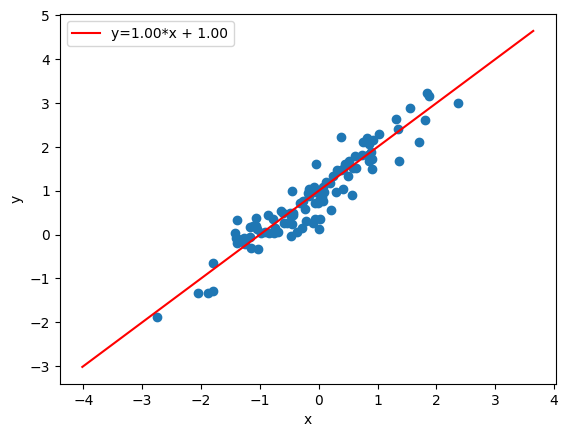

In [3]:
gen_model.visualize_model()

サンプルを生成し，変数`x`, `y`に保存するには以下のメソッドを用います．

In [4]:
x,y = gen_model.gen_sample(sample_size=100)

後で利用するためにテスト用のデータも生成しておきましょう．

In [5]:
x_test,y_test = gen_model.gen_sample(sample_size=100)

### `LearnModel`による学習と意思決定

`LearnModel`を用いて，先ほど生成したデータからモデルを学習してみましょう．

もちろん，`LearnModel`に与えことのできるデータは`GenModel`から生成したデータに限りません．様々な実データを分析することができます．

まずは学習用モデルのインスタンスを生成します．ここではモデルの定数として次数`c_degree = 2`だけを指定しています．他に，事前分布のハイパーパラメータを設定することもできます．

In [6]:
learn_model = linearregression.LearnModel(
    c_degree = 2, # degree
)

`LearnModel`にはパラメータの事後分布を可視化する関数が実装されています．この時点でパラメータの事後分布を可視化すると，まだデータからの学習を行っていないので事前分布が表示されます．

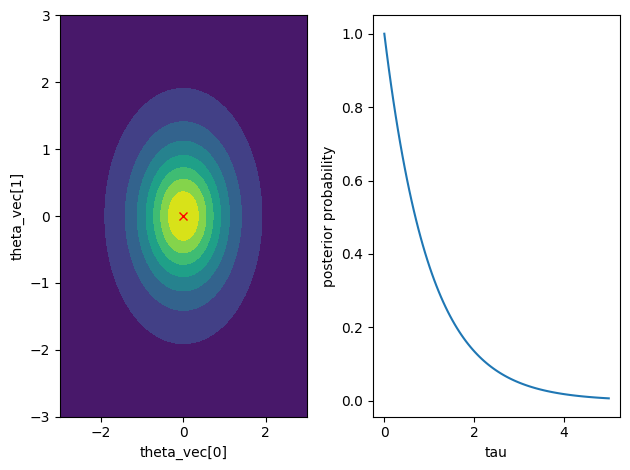

In [7]:
learn_model.visualize_posterior()

データからの学習によって事後分布を更新するには，以下のメソッドを用います．

In [8]:
learn_model.update_posterior(x,y)

更新された事後分布を可視化すると，事後分布の密度が`x,y`を生成するときに用いた真のパラメータの近くに移動していることがわかります．

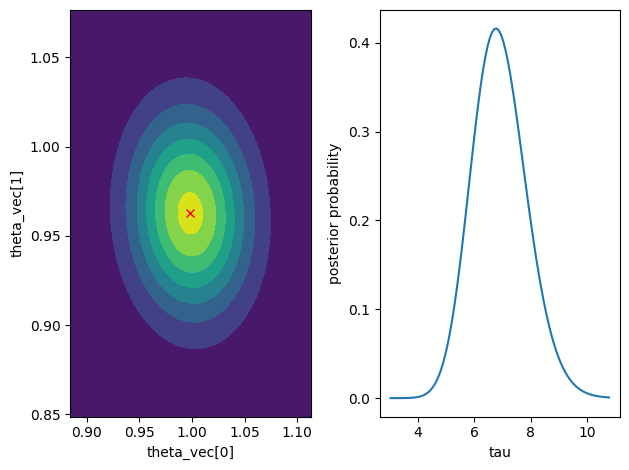

In [9]:
learn_model.visualize_posterior()

学習されたモデルに基づいてパラメータ推定や新規データの予測などの意思決定を行うには，以下のようにします．

パラメータ推定を行うためには，`estimate_params`メソッドを用います．`loss`オプションを`squared`に指定することで，二乗誤差損失関数に基づくベイズリスク関数を最小にする推定値が得られます．得られる値はパラメータの事後分布の期待値となります．

In [10]:
learn_model.estimate_params(loss="squared",dict_out=True)

{'theta_vec': array([0.99846525, 0.96263024]), 'tau': 6.9036925167513195}

`loss`オプションを`abs`に指定すると，絶対誤差損失関数に基づくベイズリスク関数を最小にする推定値が得られます．得られる値はパラメータの事後分布の中央値となるため，`tau`の推定値が先程と異なっています．

In [11]:
learn_model.estimate_params(loss="abs",dict_out=True)

{'theta_vec': array([0.99846525, 0.96263024]), 'tau': 6.858623148933392}

新規データに対する予測値を出力するためには，まず以下のメソッドを用いて新規説明変数に対する予測分布を計算します．

In [12]:
learn_model.calc_pred_dist(x_test)

次に，`make_prediction`メソッドを用いることで，予測値が得られます．パラメータ推定の場合と同様，`loss`オプションを指定することで損失関数を指定できます．（ただし，今回の例では事後予測分布が左右対称であるため，二乗誤差損失を仮定した場合も絶対誤差損失を仮定した場合も同じ予測値が出力されます．）

In [13]:
y_pred = learn_model.make_prediction(loss="squared")

平均二乗誤差を計算してみましょう．

In [14]:
mse = np.sum((y_test - y_pred)**2) / len(y_test)
print(f"MSE: {mse}")

MSE: 0.09020880284291456


データ生成に用いた雑音項の精度（分散の逆数）が10であったことを踏まえると，十分な精度で予測できていることがわかります．

### `GenModel`による事後分布からのサンプリング

`GenModel`は`LearnModel`で学習した事後分布からパラメータをサンプリングしたり，事後予測分布から新規データをサンプリングしたりするためにも利用できます．

まず，`LearnModel`によって学習された事後分布のハイパーパラメータは以下のように取得できます．

In [15]:
hn_params = learn_model.get_hn_params()
print(hn_params)

{'hn_mu_vec': array([0.99846525, 0.96263024]), 'hn_lambda_mat': array([[ 99.87503339,   5.96145913],
       [  5.96145913, 101.        ]]), 'hn_alpha': 51.0, 'hn_beta': 7.387351026461872}


これを`GenModel`に渡すことで，事後分布からパラメータをサンプリングできます．

パラメータサンプリング用の`GenModel`インスタンスを新たに生成し，`set_h_params`メソッドを通してハイパーパラメータを渡します．（以下では辞書型である`hn_params`の値`hn_params.values()`を`*`でアンパックして渡しています．これはBayesMLの機能ではなく，Pythonの機能です．）

In [16]:
posterior_gen_model = linearregression.GenModel(
    c_degree = 2, # degree
)
posterior_gen_model.set_h_params(*hn_params.values())

`gen_params`メソッドを用いてパラメータを生成し，`get_params`メソッドを用いて生成されたパラメータを取得します．複数回のサンプリングを行いたい場合は以下を`for`文で繰り返してください．

In [17]:
posterior_gen_model.gen_params()
print(posterior_gen_model.get_params())

{'theta_vec': array([1.00935782, 0.93804208]), 'tau': 5.50775630793475}


事後予測分布から新規データをサンプリングしたい場合，パラメータのサンプリングに続いてデータを生成してください．「[`GenModel`による人工データ生成](#genmodelによる人工データ生成)」で人工データを生成した際には`gen_sample`の引数に説明変数を与えませんでしたが，以下のように明示的に指定することもできます．

In [18]:
posterior_gen_model.gen_params()
_,y_new = posterior_gen_model.gen_sample(x=x_test[:10])
print(f"y_new: {y_new}")

y_new: [-0.49532975  2.03473075  1.13758759 -0.46735058 -0.71902336 -0.09288005
  0.89463227  2.07886012  2.81211771  1.60020635]


## パッケージ一覧

現在，以下のモデルに関するパッケージが利用可能です．本ライブラリでは，データ生成確率モデル，事前分布，事後分布（または近似事後分布），予測分布（または近似予測分布）を合わせてモデルと呼んでいます．

* [ベルヌーイモデル](https://bayesml.github.io/BayesML/bayesml.bernoulli.html "Bayesml Bernoulli Model")
* [カテゴリカルモデル](https://bayesml.github.io/BayesML/bayesml.categorical.html "BayesML Categorical Model")
* [ポアソンモデル](https://bayesml.github.io/BayesML/bayesml.poisson.html "BayesML Poisson Model")
* [正規モデル](https://bayesml.github.io/BayesML/bayesml.normal.html "BayesML Normal Model")
* [多変量正規モデル](https://bayesml.github.io/BayesML/bayesml.multivariate_normal.html "BayesML Multivariate Normal Model")
* [指数モデル](https://bayesml.github.io/BayesML/bayesml.exponential.html "BayesML Exponential Model")
* [混合正規モデル](https://bayesml.github.io/BayesML/bayesml.gaussianmixture.html "BayesML Gaussian Mixture Model")
* [線形回帰モデル](https://bayesml.github.io/BayesML/bayesml.linearregression.html "BayesML Lenear Regression Model")
* [メタツリーモデル](https://bayesml.github.io/BayesML/bayesml.metatree.html "BayesML Meta-tree Model")
* [自己回帰モデル](https://bayesml.github.io/BayesML/bayesml.autoregressive.html "BayesML Autoregressive Model")
* [隠れマルコフモデル](https://bayesml.github.io/BayesML/bayesml.hiddenmarkovnormal.html "BayesML Hidden Markov Normal Model")
* [文脈木モデル](https://bayesml.github.io/BayesML/bayesml.contexttree.html "BayesML Context Tree Model")

また，今後はより複雑な階層的モデルを取り扱うパッケージを追加していく予定です．

## コントリビューションの方法

BayesMLへのコントリビューションを考えてくださってありがとうございます．詳細については[こちら](./CONTRIBUTING_jp.md)をご覧ください．

## 参照方法

学術的な成果にBayesMLをご利用いただく際は以下の文献参照をお示しいただければ幸いです．

プレーンテキスト

BibTeX